<a href="https://colab.research.google.com/github/Yaizlll/Projet_FLD/blob/main/Projet_FLD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [3]:
install.packages('mvtnorm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages('MixSim')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages('MASS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Partie 1

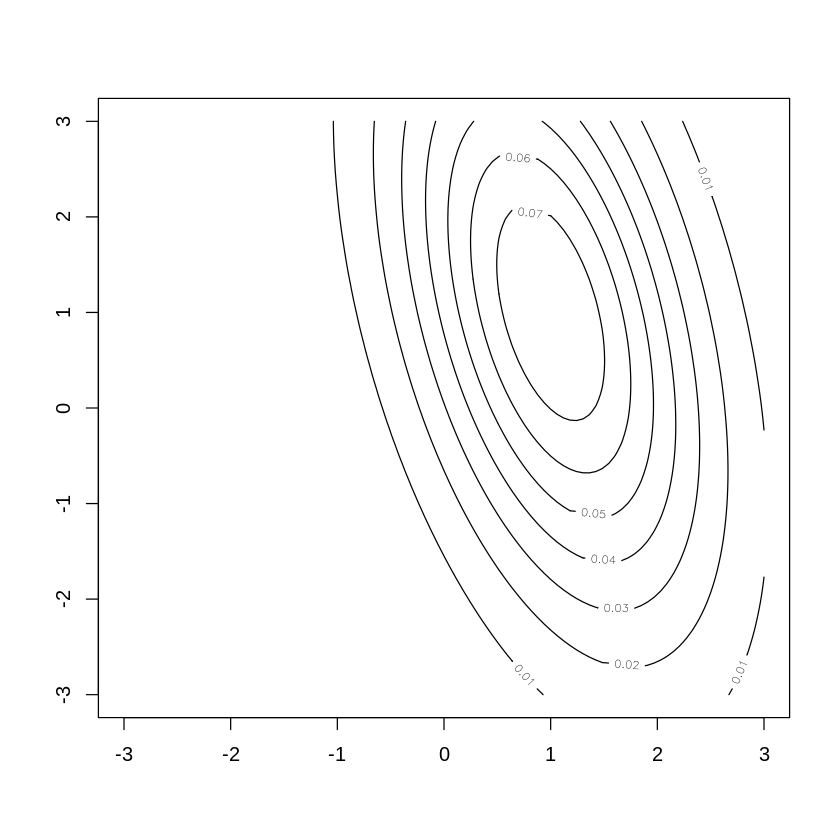

In [4]:
# exemples - cours FLD

## Exemple 1 - mvtnorm
library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(1,1)
sigma <- matrix(c(1,-1,-1,5),nrow=2)
for (i in 1:100) {
  for (j in 1:100) {
    z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                      mean=mu,sigma=sigma)
  }
}
contour(x.points,y.points,z)

In [260]:
## Exemple 2 - MixSim
library("MixSim")
library("MASS")

# Création de jeux de données avec MixSim
# jeu 1
jeu1.Q <- MixSim(MaxOmega = 0.0, BarOmega = 0.0, K = 2, p = 2, sph = TRUE)
jeu1 <- simdataset(n = 500, Pi = jeu1.Q$Pi, Mu = jeu1.Q$Mu, S = jeu1.Q$S)

#jeu 2
jeu2.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = TRUE)
jeu2 <- simdataset(n = 500, Pi = jeu2.Q$Pi, Mu = jeu2.Q$Mu, S = jeu2.Q$S)

#jeu 3
jeu3.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = FALSE)
jeu3 <- simdataset(n = 500, Pi = jeu3.Q$Pi, Mu = jeu3.Q$Mu, S = jeu3.Q$S)


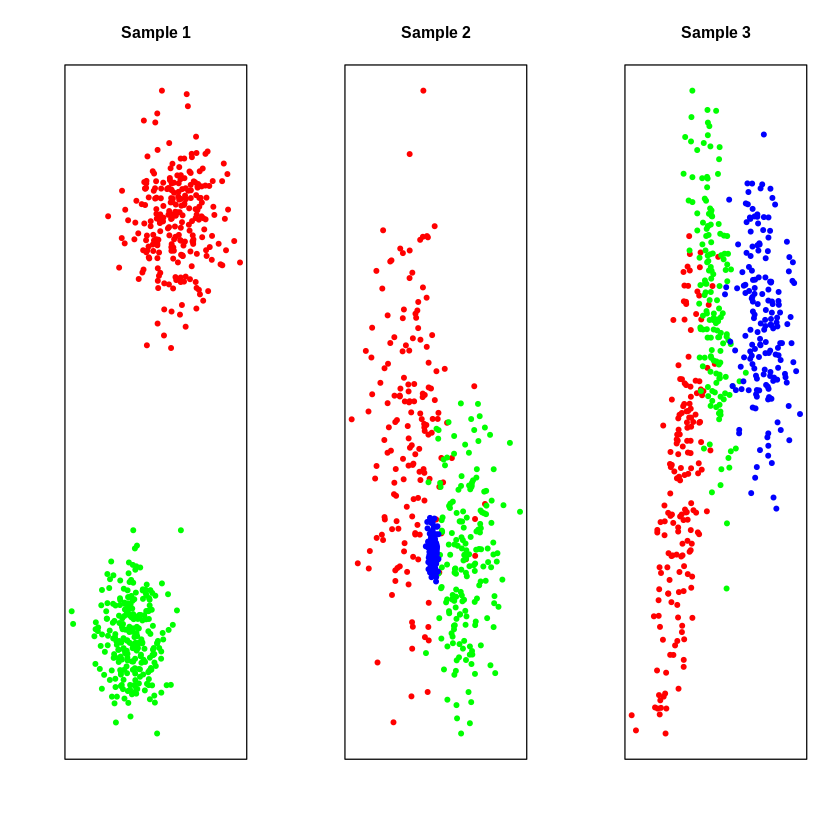

In [10]:
# Représentation graphique 
my_plot = function(jeu, predicts, title){
  plot(jeu$X, col = colors[predicts], pch = 19, cex = 0.8,
       xlab = "", ylab = "", axes = F, main = title)
  box()
}

colors <- c("red", "green", "blue")
par(mfrow=c(1,3))
my_plot(jeu1,jeu1$id,"Sample 1")
my_plot(jeu2,jeu2$id,"Sample 2")
my_plot(jeu3,jeu3$id,"Sample 3")

# Partie 2

##1. Implémenter gi(X)


In [359]:
Gi_X <- function(x,mean,mean_i,covariance_i,p_i) {
  suppressWarnings({
    x_mi<-matrix(nrow=nrow(x),ncol=ncol(x))
    print(dim(x_mi))
    for (i in 1:nrow(x)){ 
      a = x[i,]-mean_i
      x_mi[i,]= a
      }

    x_m <-matrix(nrow=nrow(x),ncol=ncol(x))
    print(dim(x_m))
    
    for (j in 1:nrow(x)){ 
      b = x[j,]-mean
      x_m[j,]<-b
      }
    })

  c <- -1/2*(t(x_mi))*as.vector((1/covariance_i))*as.vector(x_m)
  d <- 1/2*log(abs(covariance_i), base = exp(1)) + log(p_i)

   suppressWarnings({
    regle<-matrix(nrow=nrow(c),ncol=ncol(c))
    print(dim(regle))
    for (i in 1:nrow(c)){ 
      sub = x[i,]-d
      regle[i,]= sub
      }

    })
  #regle<- c-d
  
  return (regle)
}


In [338]:
x=jeu1$X
mean_i = u1_jeu1
mean = mean_jeu1

covariance_i = M_cov1_jeu1


suppressWarnings({
  x_mi<-matrix(nrow=nrow(x),ncol=ncol(x))
  print(dim(x_mi))
  for (i in 1:nrow(x)){ 
    a = x[i,]-mean_i
    x_mi[i,]= a
    }
  x_m <-matrix(nrow=nrow(x),ncol=ncol(x))
  print(dim(x_m))
  for (j in 1:nrow(x)){ 
    b = x[j,]-mean
    x_m[j,]<-b
  }
    
})

[1] 500   2
[1] 500   2


In [342]:
M_cov1_jeu1

,X.1,X.2
X.1,0.0041162125,0.0001388566
X.2,0.0001388566,0.0030057705


In [345]:
print(class(-1/2*(t(x_mi))))

[1] "matrix" "array" 


In [348]:
-1/2*t(x_mi)

0.07084791,0.05016748,0.07999859,0.06818786,0.05079655,0.06858114,0.07342777,0.04690548,0.06415359,0.06734538,⋯,-0.03543431,-0.06542948,-0.05186609,-0.1086404,0.04688005,-0.1027297,-0.04561609,-0.04576857,-0.1318182,0.007606843
0.09128575,0.07593460,0.08714849,0.09220385,0.09623074,0.10316908,0.06598086,0.07430359,0.10029586,0.06625979,⋯,0.52439851,0.48289749,0.37875012,0.4062265,0.42991301,0.4813395,0.36677614,0.43980409,0.4236509,0.379756408


In [349]:
1/covariance_i

,X.1,X.2
X.1,242.9418,7201.6761
X.2,7201.6761,332.6934


In [356]:
-1/2*(t(x_mi))*as.vector((1/covariance_i))*as.vector(x_m)

-1.390561,-35.800925,-0.7907687,-42.207354,-0.8317809,-38.92703,-1.719336,-12.248088,-2.189428,-16.023935,⋯,5.553265,296.98901,7.267723,540.33237,-6.656404,582.5117,5.497432,197.2362,15.11919,-32.09501
-25.921519,-1.906606,-47.8600831,-1.009403,-51.1350380,-2.72335,-48.578261,-2.186584,-43.333113,-0.533254,⋯,-2299.531484,-77.65463,-1797.422402,-57.33151,-1246.069737,-112.7953,-1455.462854,-102.6061,-1886.04686,-62.92848


In [ ]:
*(x_m)

In [212]:
#log(exp(1), base = exp(1))

In [214]:
#log(M, base = exp(1))

In [216]:
#abs(M)

## 2. Appliquer la règle.


### Jeu1

In [221]:
jeu1_df <- data.frame(jeu1)  
head(jeu1_df)

,X.1,X.2,id
,<dbl>,<dbl>,<int>
1,0.08350963,0.9357153,1
2,0.15115092,1.0041838,1
3,0.19779518,1.0050691,1
4,0.23094065,0.9686297,1
5,0.28101284,0.9340198,1
6,0.23150232,0.8868702,1


In [224]:
# covariance par calsse
M1_jeu1 <-cbind(jeu1_df[jeu1_df$id==1,])
M_cov1_jeu1 = cov(M1_jeu1[c("X.1", "X.2")])
1/M_cov1_jeu1

M2_jeu1 <-cbind(jeu1_df[jeu1_df$id==2,])
M_cov2_jeu1 = cov(M2_jeu1[c("X.1", "X.2")])
1/M_cov2_jeu1

,X.1,X.2
X.1,242.9418,7201.6761
X.2,7201.6761,332.6934


,X.1,X.2
X.1,434.3931,-21212.1461
X.2,-21212.1461,472.2836


In [319]:
# moyen génaral de jeu1 u
mean_jeu1 = cbind(colMeans(jeu1_df))
mean_jeu1 <- cbind(mean_jeu1[c("X.1", "X.2"),])
mean_jeu1
mean_jeu1_t <- t(mean_jeu1)
mean_jeu1_t

X.1,0.1717479
X.2,0.6961444


X.1,X.2
0.1717479,0.6961444


In [275]:
# moyens de classes pour jeu1
u1_jeu1 = cbind(colMeans(jeu1_df[jeu1_df$id==1,]))
u1_jeu1 <- cbind(u1_jeu1[c("X.1", "X.2"),])
u1_jeu1

u2_jeu1 = cbind(colMeans(jeu1_df[jeu1_df$id==2,]))
u2_jeu1 <- cbind(u2_jeu1[c("X.1", "X.2"),])
u2_jeu1


X.1,0.2326532
X.2,0.9575785


X.1,0.1113280
X.2,0.4367934


In [227]:
# p(c1):
#jeu1_df
P_c1_jeu1 = nrow(jeu1_df[jeu1_df$id==1,])/nrow(jeu1_df)
P_c1_jeu1

# p(c2):
#jeu1_df
P_c2_jeu1 = nrow(jeu1_df[jeu1_df$id==2,])/nrow(jeu1_df)
P_c2_jeu1


[1] 0.498

[1] 0.502

#### Classe 1:

In [361]:
# Appliquer règle:
pre1_jeu1 = Gi_X(jeu1$X,mean_jeu1,u1_jeu1,M_cov1_jeu1,P_c1_jeu1)
pre1_jeu1

[1] 500   2
[1] 500   2
[1]   2 500


3.534523,5.913197,5.229147,4.375773,3.534523,5.913197,5.229147,4.375773,3.534523,5.913197,⋯,5.229147,4.375773,3.534523,5.913197,5.229147,4.375773,3.534523,5.913197,5.229147,4.375773
3.575884,5.943899,5.270508,4.406475,3.575884,5.943899,5.270508,4.406475,3.575884,5.943899,⋯,5.270508,4.406475,3.575884,5.943899,5.270508,4.406475,3.575884,5.943899,5.270508,4.406475


In [363]:
my_plot = function(jeu, predicts, title){
  plot(jeu, col = colors[predicts], pch = 19, cex = 0.8,
       xlab = "", ylab = "", axes = F, main = title)
  box()
}

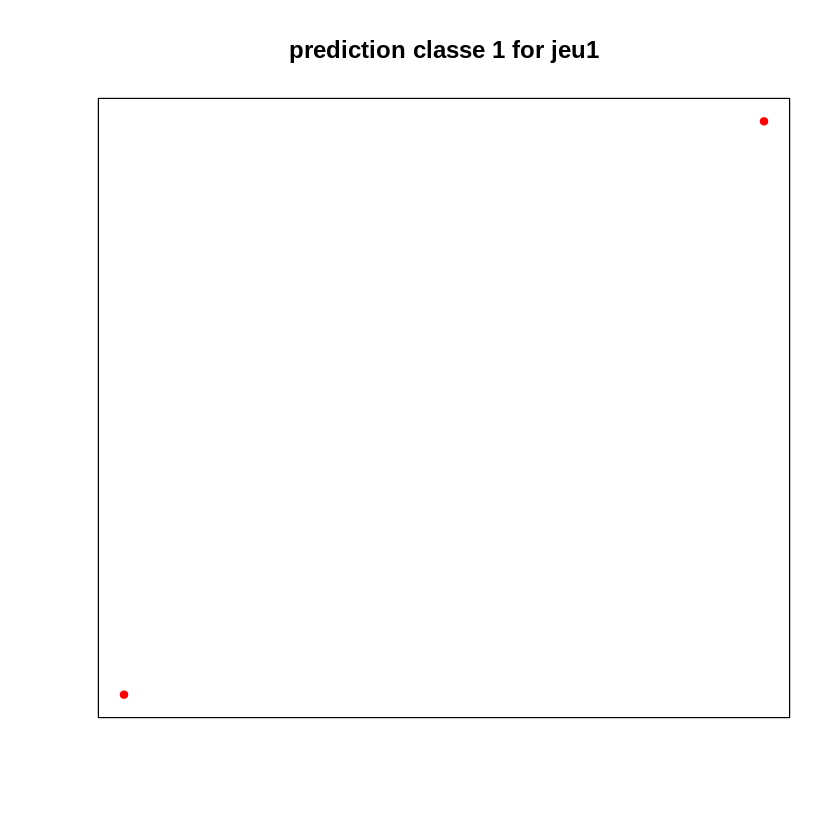

In [364]:
my_plot(pre1_jeu1,jeu1$id,"prediction classe 1 for jeu1")

## 3. Conclusion